In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import numpy as np
import time
from datetime import datetime
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
import os

In [30]:
def splot(df, x, y, hue=None, legend=True, ylog=False, xlog=False):
    f, ax = plt.subplots(figsize=(6, 6))
    sb.set_theme(style="whitegrid")
    if ylog:
        ax.set(yscale="log")
    if xlog:
        ax.set(xscale="log")
    sb.scatterplot(x=x, y=y, hue=hue, ax=ax, data=df)
    ax.legend(title=hue, loc="center left", bbox_to_anchor=(1, 0.5))
    if ax.get_legend() and not legend:
        ax.get_legend().remove()
    ax.set_xlim([0, 1500])
    ax.set_ylim([0.1, 1000])

In [139]:
def get_sec(time):
    h,m,s = time.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

def read_log_stats(file):
    txt = ""
    with open(file, "r") as f:
        txt = f.read()
    
    cpu_time = float(txt.split("User time (seconds):")[1].split("\n")[0].strip())
    mem_mb = int(txt.split("Maximum resident set size (kbytes):")[1].split("\n")[0]) / 1024

    return (cpu_time, mem_mb)

def read_fasta_stats(file):
    fasta = ""
    cumlen = 0
    seqcount = 0
    reflen = 0
    with open(file) as f:
        fasta = ("\n" + f.read()).split("\n>")[1:]
    for seq in fasta:
        seqcount += 1
        cumlen += len(seq.split("\n")[1])
        if reflen == 0:
            reflen = cumlen
    return (cumlen, seqcount, reflen)

def benchmark(logdir, fasta_dir):
    data = []
    logs = sorted(glob.glob(os.path.join(logdir, "*.out")))
    for log in logs:
        cluster = log.split("/")[-1].split(".")[0]
        duration, mem_mb = read_log_stats(log)
        cumlen, seqcount, reflen = read_fasta_stats(os.path.join(fasta_dir, cluster + ".clean.fasta"))
        data.append((cluster, duration, mem_mb, cumlen, seqcount, cumlen / seqcount, reflen))
    return pd.DataFrame(data, columns=["cluster", "CPU time (seconds)", "Memory (Mb)", "sum_length", "Cluster Size", "Avg. Sequence Length", "Reference Length"]).set_index("cluster").rename_axis(index=None)



In [150]:
def plot_seff(stats, clean, alpha, delta):
    df = benchmark(stats, clean)
    fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

    sb.set_theme(style="whitegrid")

    cmap = plt.colormaps['viridis_r']

    plot = ax[0].scatter(x="Reference Length", y="CPU time (seconds)", c="Cluster Size", cmap=cmap, data=df)
    ax[1].scatter(x="Reference Length", y="Memory (Mb)", c="Cluster Size", cmap=cmap,  data=df)

    ax[0].set_xlabel("Representative Sequence Length")
    ax[1].set_xlabel("Representative Sequence Length")

    ax[0].set_ylabel("CPU time (seconds)")
    ax[1].set_ylabel("Memory (Mb)")

    ax[0].set(yscale="log")
    # ax[0].set(xscale="log")

    # ax[1].set(yscale="log")
    # ax[1].set(xscale="log")
    
    # ax[0].legend(title="Cluster Size", loc="center left", bbox_to_anchor=(1, 0.5))
    # ax[1].legend(title="Cluster Size", loc="center left", bbox_to_anchor=(1, 0.5))
    # ax[0].legend()

    # ax[0].set_xlim([0, 1500])
    # ax[0].set_ylim([0.1, 1000])
    cbar = fig.colorbar(plot, ax=ax)
    cbar.set_label('Cluster Size', rotation=270)
    plt.savefig(f"runtime/runtime_a{alpha}.d{delta}.pdf")
    plt.show()
    return df

In [151]:
def plot_all_clusters(path, alphas, deltas):
    for alpha in alphas:
        for delta in deltas:
            df = plot_seff(f"{path}/safety.a{alpha}.d{delta}/benchmark", f"{path}/clean/", alpha, delta)
            print(f"Mean CPU Time: {df['CPU time (seconds)'].mean()}")
            print(f"Avg. Memory (Mb): {df['Memory (Mb)'].mean()}")


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


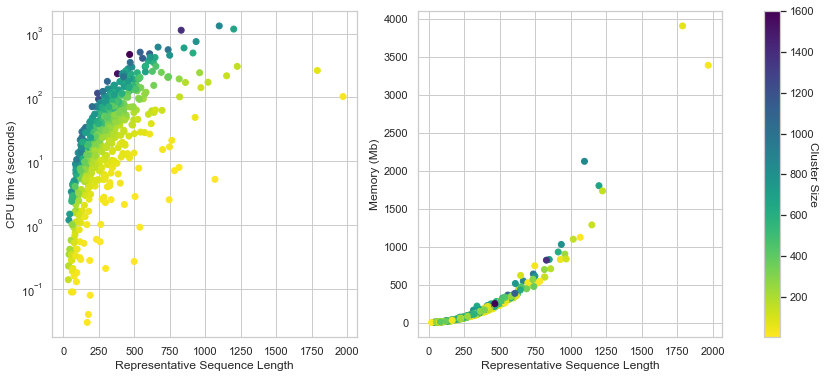

Mean CPU Time: 68.66797794117646
Avg. Memory (Mb): 160.28016572840073


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


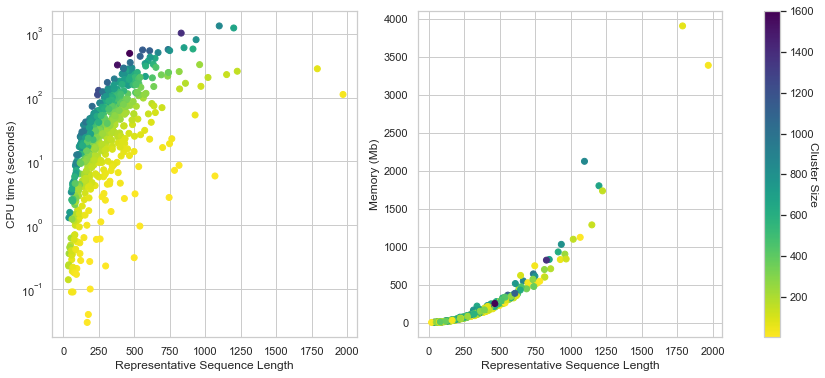

Mean CPU Time: 73.7165625
Avg. Memory (Mb): 160.35972684972427


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


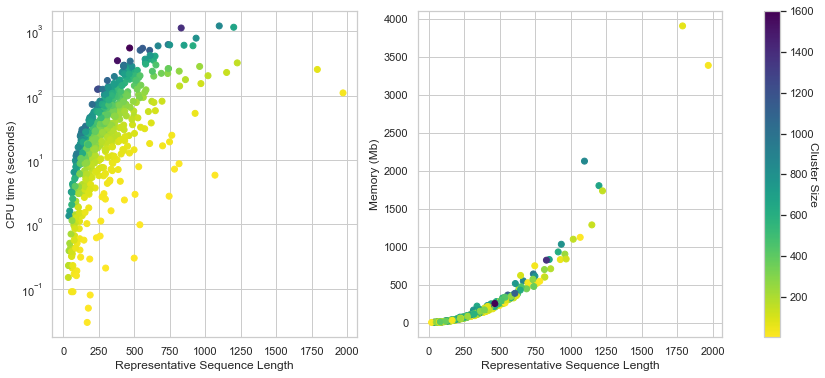

Mean CPU Time: 75.74764705882353
Avg. Memory (Mb): 160.48386517693015


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


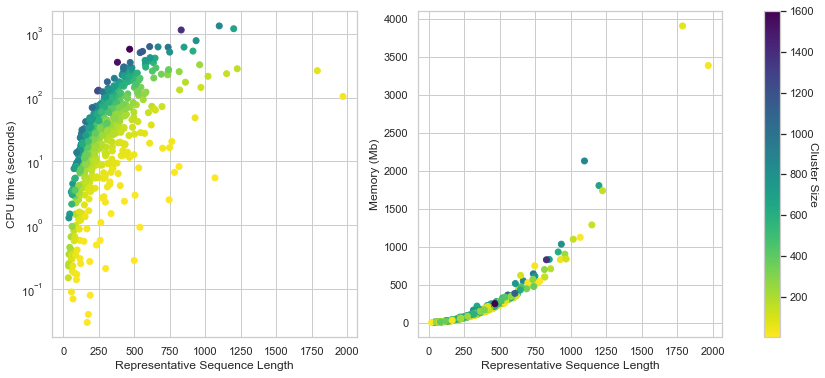

Mean CPU Time: 75.62007352941177
Avg. Memory (Mb): 160.6356201171875


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


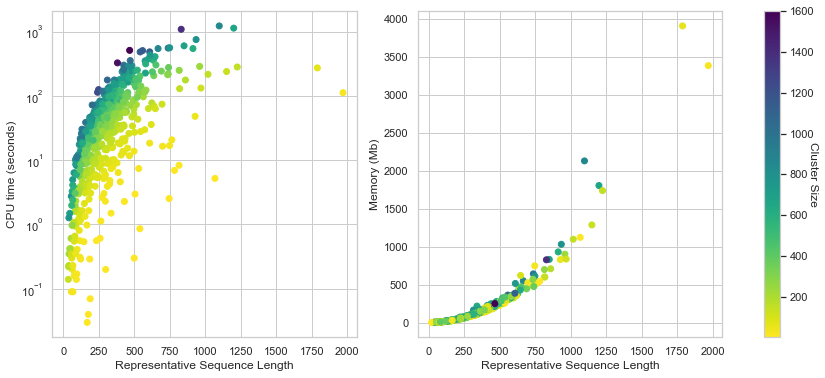

Mean CPU Time: 72.88022058823529
Avg. Memory (Mb): 160.76540958180146


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


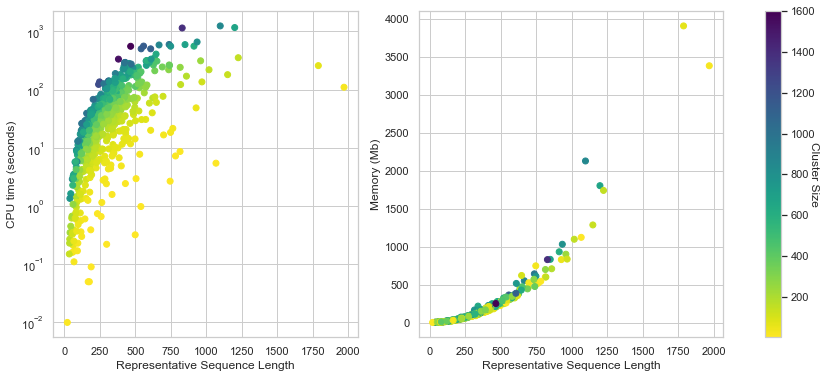

Mean CPU Time: 73.0758455882353
Avg. Memory (Mb): 160.93710506663604


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


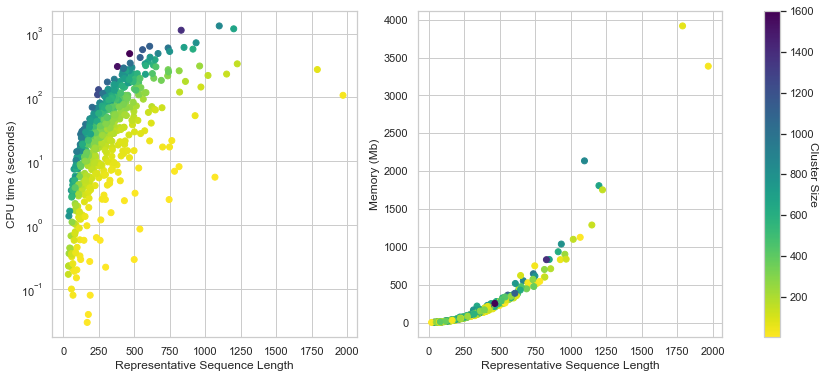

Mean CPU Time: 73.30270220588235
Avg. Memory (Mb): 161.4903133616728


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


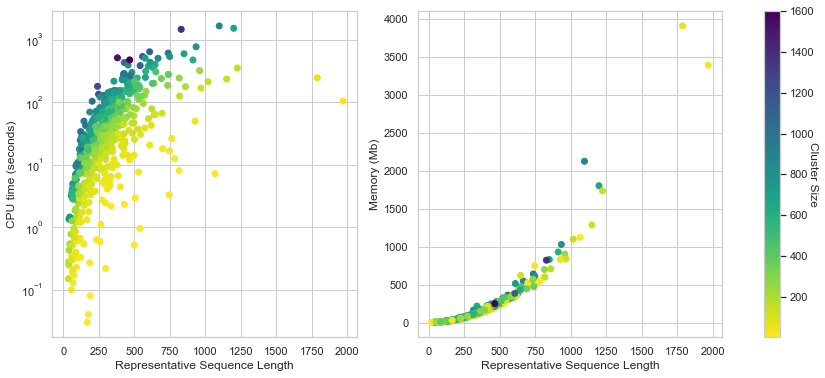

Mean CPU Time: 77.16838235294118
Avg. Memory (Mb): 160.2743709788603


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


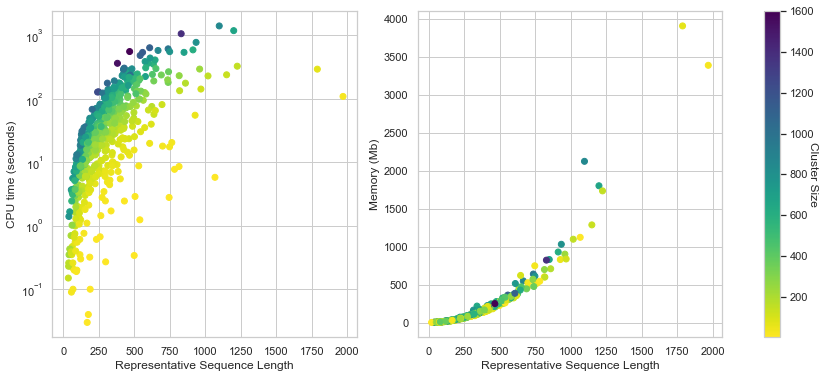

Mean CPU Time: 74.88773897058825
Avg. Memory (Mb): 160.3428452435662


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


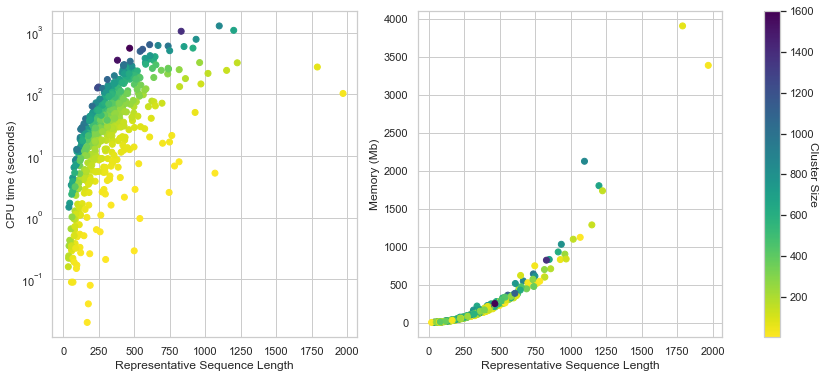

Mean CPU Time: 75.60867647058824
Avg. Memory (Mb): 160.43255256204043


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


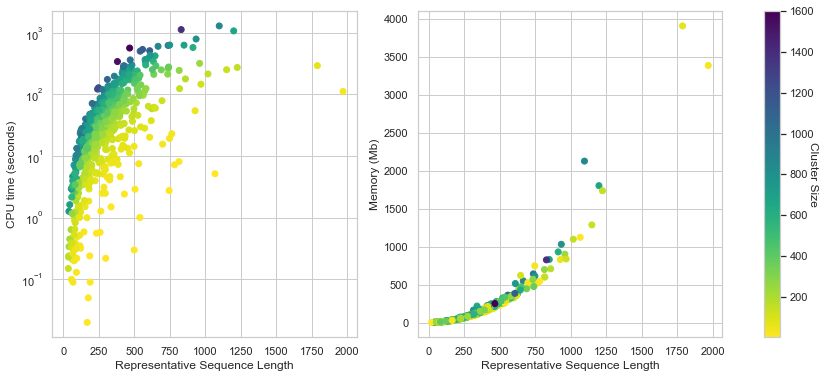

Mean CPU Time: 75.45691176470588
Avg. Memory (Mb): 160.55730842141543


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


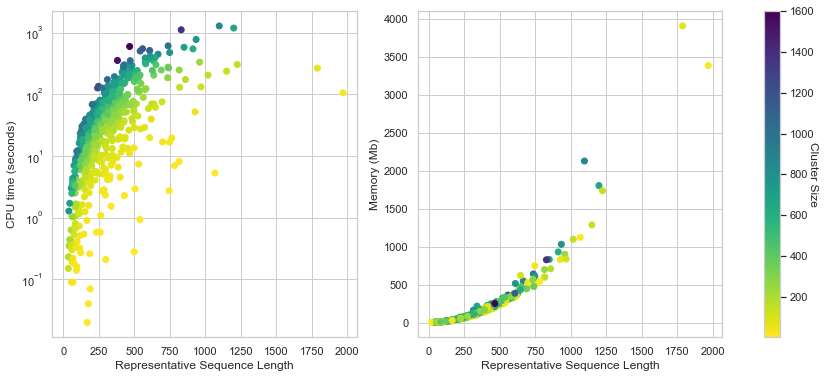

Mean CPU Time: 74.66733455882353
Avg. Memory (Mb): 160.7119858685662


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


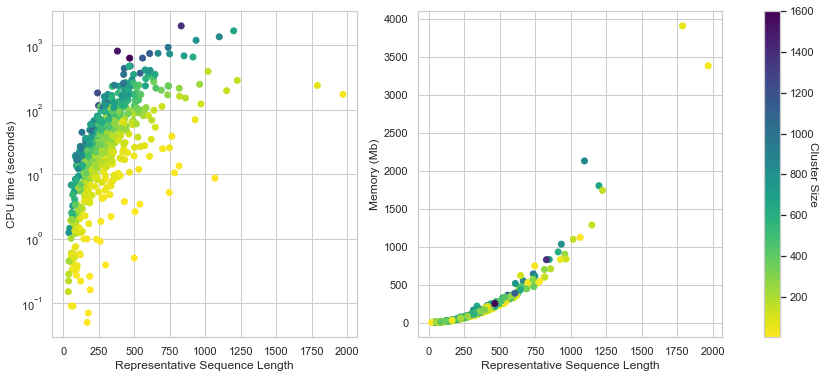

Mean CPU Time: 84.84941176470589
Avg. Memory (Mb): 160.8643367991728


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


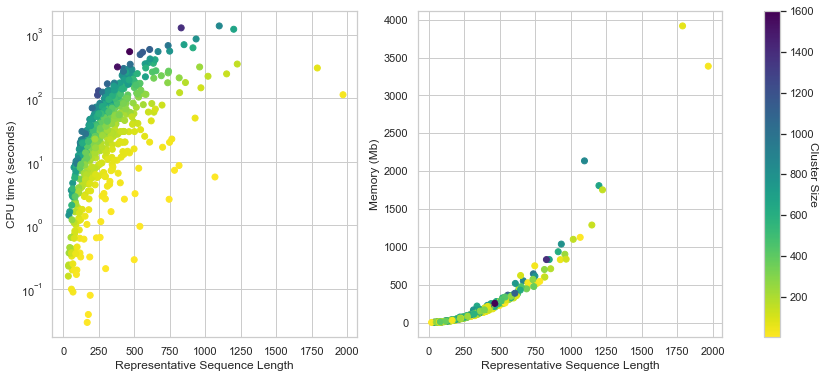

Mean CPU Time: 73.52913602941177
Avg. Memory (Mb): 161.43265309053308


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


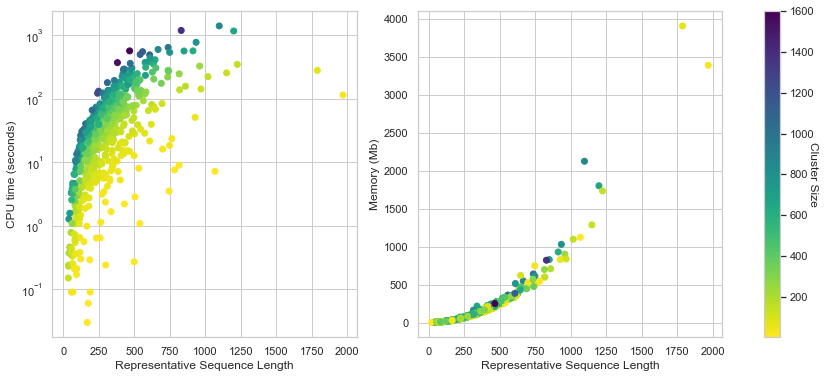

Mean CPU Time: 75.13119485294118
Avg. Memory (Mb): 160.2825927734375


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


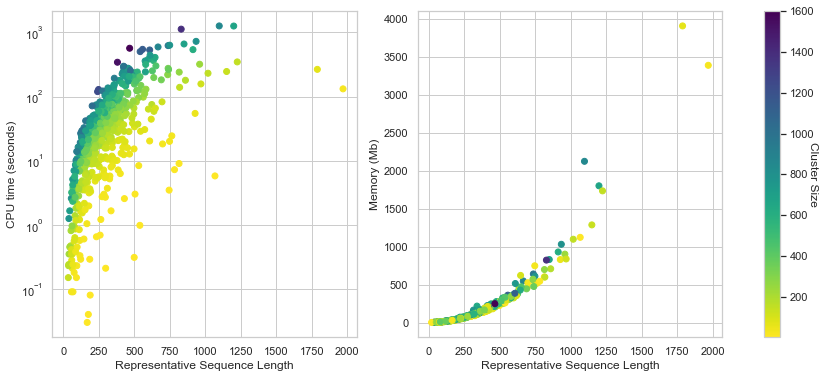

Mean CPU Time: 74.8096875
Avg. Memory (Mb): 160.3389389935662


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


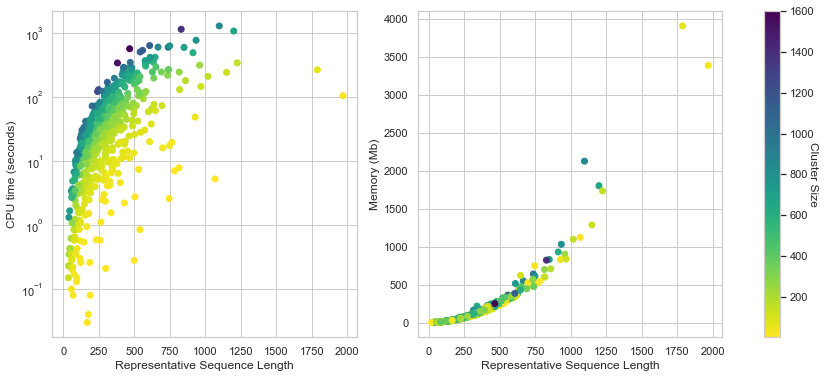

Mean CPU Time: 75.56845588235295
Avg. Memory (Mb): 160.42840935202207


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


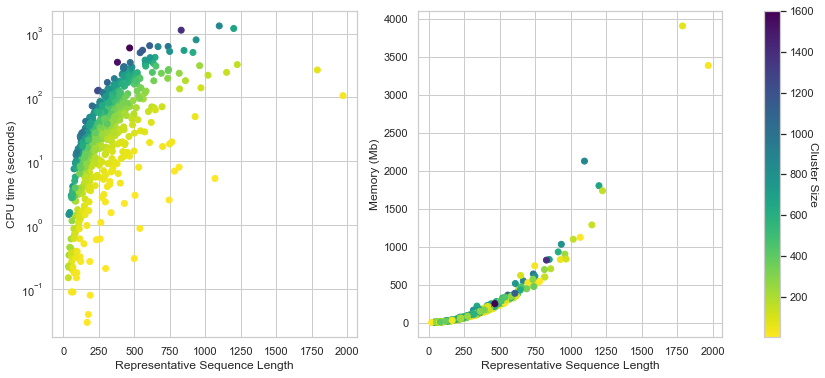

Mean CPU Time: 75.74349264705882
Avg. Memory (Mb): 160.54628619025735


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


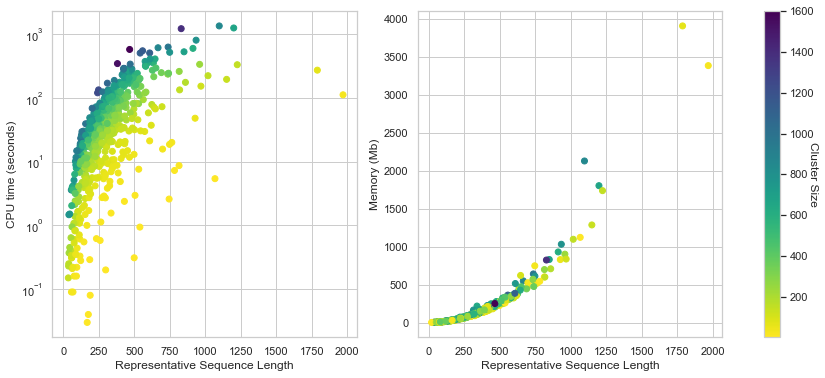

Mean CPU Time: 75.79847426470587
Avg. Memory (Mb): 160.66962028952207


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


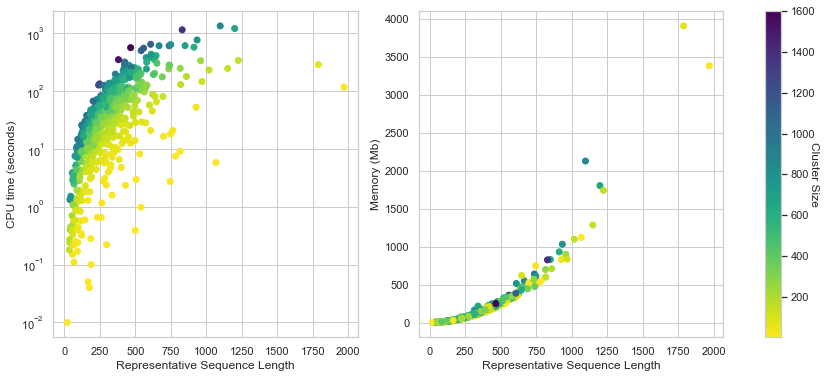

Mean CPU Time: 75.64650735294119
Avg. Memory (Mb): 160.84249339384192


/var/folders/2y/zpyy0f354dxd6zp0b92b3fkr0000gn/T/ipykernel_83165/2825702741.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(plot, ax=ax)


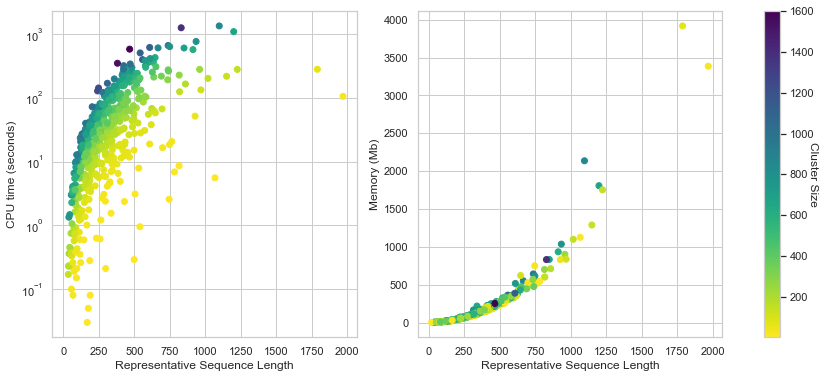

Mean CPU Time: 74.41722426470588
Avg. Memory (Mb): 161.40989056755515


In [152]:
plot_all_clusters("../out/sprot_filtered.20.multi-step", [51,75,100], [0,2,4,6,8,10,15])